### Задача #1

Есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
water_deaths = pd.read_csv('water.csv')
water_deaths.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


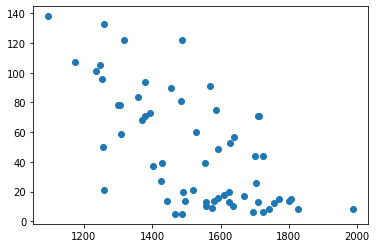

In [4]:
plt.scatter(water_deaths['mortality'], water_deaths['hardness']) # Построить точечный график

In [8]:
water_deaths[['mortality', 'hardness']].corr() # Рассчитать коэффициент корреляции Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
water_deaths[['mortality', 'hardness']].corr(method='spearman') # Рассчитать коэффициент корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [15]:
X = water_deaths[['mortality']].values
Y = water_deaths['hardness'].values

In [16]:
X.shape, Y.shape

((61, 1), (61,))

In [26]:
model = LinearRegression() # Построить модель линейной регрессии
model.fit(X, Y) # оптимальные значение весов, используя существующие вход и выход (x и y) в качестве аргументов
model.score(X, Y) # коэффициент детерминации

0.4288267193124973

In [21]:
a = model.coef_ # наклон расчетной линии регрессии
b = model.intercept_ # точку, где расчётная линия регрессии пересекает ось 
a, b

(array([-0.13292453]), 249.77692756960676)

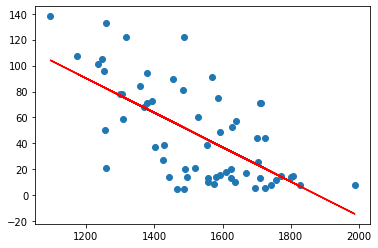

In [19]:
plt.scatter(water_deaths['mortality'], water_deaths['hardness'])
plt.plot(water_deaths['mortality'], model.predict(water_deaths[['mortality']]), c='r')

In [36]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        21:43:40   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

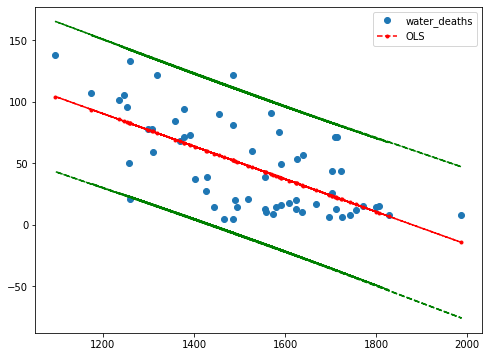

In [37]:
prstd, iv_l, iv_u = wls_prediction_std(results) # Вывести график остатков

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="water_deaths")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend();

### Задание #2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [77]:
South = water_deaths[water_deaths['location'] == 'South']
South.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [78]:
North = water_deaths[water_deaths['location'] == 'North']
North.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


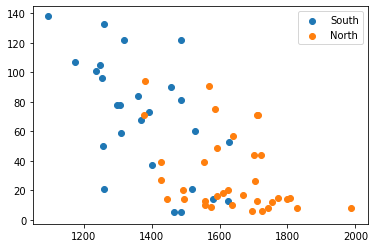

In [79]:
plt.scatter(South['mortality'], South['hardness'], label="South")
plt.scatter(North['mortality'], North['hardness'], label="North")
plt.legend()

In [80]:
pirson = South[['mortality', 'hardness']].corr()
spearman = South[['mortality', 'hardness']].corr(method='spearman')
pirson[:1], spearman[:1]

(           mortality  hardness
 mortality        1.0 -0.602153,
            mortality  hardness
 mortality        1.0 -0.595723)

In [81]:
pirson = North[['mortality', 'hardness']].corr()
spearman = North[['mortality', 'hardness']].corr(method='spearman')
pirson[:1], spearman[:1]

(           mortality  hardness
 mortality        1.0 -0.368598,
            mortality  hardness
 mortality        1.0 -0.404208)

In [82]:
X_south = South[['mortality']].values
Y_south = South['hardness'].values

In [83]:
model_south = LinearRegression() 
model_south.fit(X_south, Y_south) 
model_south.score(X_south, Y_south)

0.3625885624364601

In [84]:
X_north = North[['mortality']].values
Y_north = North['hardness'].values

In [85]:
model_north = LinearRegression() 
model_north.fit(X_north, Y_north) 
model_north.score(X_north, Y_north)

0.1358643664207173

In [103]:
X_north = sm.add_constant(X_north)
model_north_ols = sm.OLS(Y_north, X_north)
results_north_ols = model_north_ols.fit()

X_south = sm.add_constant(X_south)
model_south_ols = sm.OLS(Y_south, X_south)
results_south_ols = model_south_ols.fit()

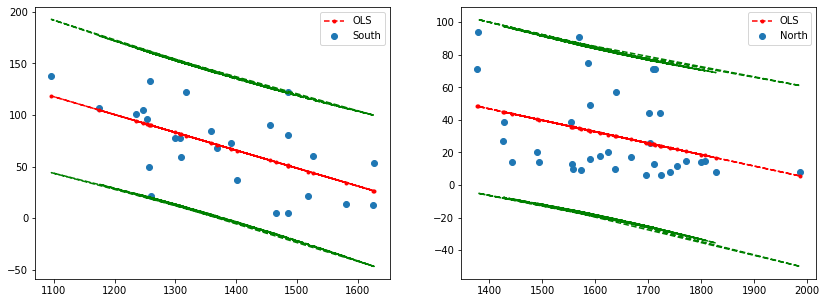

In [110]:
prstdN, iv_lN, iv_uN = wls_prediction_std(results_north_ols)
prstdS, iv_lS, iv_uS = wls_prediction_std(results_south_ols)

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].scatter(South['mortality'], South['hardness'], label="South")
#axes[0].plot(South['mortality'], model_south.predict(South[['mortality']]), c='r')

axes[0].plot(X_south[:,1], results_south_ols.fittedvalues, 'r--.', label="OLS")
axes[0].plot(X_south[:,1], iv_uS, 'g--')
axes[0].plot(X_south[:,1], iv_lS, 'g--')
axes[0].legend()

axes[1].scatter(North['mortality'], North['hardness'], label="North")
#axes[1].plot(North['mortality'], model_north.predict(North[['mortality']]), c='r')

axes[1].plot(X_north[:,1], results_north_ols.fittedvalues, 'r--.', label="OLS")
axes[1].plot(X_north[:,1], iv_uN, 'g--')
axes[1].plot(X_north[:,1], iv_lN, 'g--')
axes[1].legend()